In [1]:
import os
import numpy as np

BBO_experiments_dict = {
    "BBO DotProduct": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/03.01_optim_HOMO_baseline_10_runs/GPRWrapper(DotProduct( sigma_0=1))-Shingles_count-Expected_improvement",
    "BBO RBF": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/03.02_optim_HOMO_baseline_RBF_10_runs/GPRWrapper(RBF( length_scale=1))-Shingles_count-Expected_improvement",
    "BBO reproduction": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/03.03_optim_HOMO_baseline_1*RBF_former_parameters_10_runs/GPRWrapper(RBF( length_scale=1))-Shingles_count-Expected_improvement",
    "BBO reproduction norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/03.03.02_optim_HOMO_baseline_1*RBF_former_parameters_with_normalization_10_runs/GPRWrapper(1*RBF( length_scale=1))-Shingles_count-Expected_improvement",
    "BBO reproduction no constant kernel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/03.03.03_optim_HOMO_baseline_RBF_former_parameters_no_constant_kernel_10_runs/GPRWrapper(RBF( length_scale=1))-Shingles_count-Expected_improvement",
    "BBO best model": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/03.04_optim_HOMO_best_model_10_runs/GPRWrapper(RBF( length_scale=1))-MBTR-Expected_improvement",
    "Former BBO model" : os.environ["DATA"] + "/07_BBO/03_bbo_optim/02.02_optim_HOMO_subgrid_from_methane_10_runs/GPRWrapper(GPR(1*RBF()))-Shingles_count-Expected_improvement"
}

EvoMol_experiments_dict = {
    "EvoMol baseline": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/02.01_EvoMol_from_methane_optim_HOMO_10_runs",
    "EvoMol pop. 300": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v2/02.02_EvoMol_from_methane_optim_HOMO_pop_300_10_runs",
    "Former EvoMol model": os.environ["DATA"] + "/07_BBO/03_bbo_optim/02.01_EvoMol_from_methane_optim_HOMO_10_runs"
}

sub_experiments_names = [str(i) for i in range(1, 11)]

ECDF_TARGETS = np.arange(-10, -1, 0.01)
ERT_TARGETS = np.arange(-10, -1, 0.5)

In [2]:
from bbo.postprocessing import extract_multiple_BBO_experiments_data, extract_multiple_evomol_experiments_data

def extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names):
    
    results_dict = {}
    
    for exp_name, path in BBO_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_BBO_experiments_data(path, sub_experiments_names)
        
    for exp_name, path in EvoMol_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_evomol_experiments_data(path, sub_experiments_names)

    return results_dict

In [3]:
results_dict = extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from bbo.evaluation import compute_ecdf

def plot_ECDF(results_dict):
    
    plt.figure(figsize=(15, 10))
    plt.xlim(1, 3100)
    plt.ylim(0, 1)
    
    for experiment_name in results_dict.keys():
        
        obj_calls, ecdf_vect = compute_ecdf(
            obj_calls_list=results_dict[experiment_name]["dataset_success_n_calls"],
            obj_values_list=results_dict[experiment_name]["dataset_success_obj_value"],
            targets=ECDF_TARGETS
        )
        
        sns.lineplot(obj_calls, ecdf_vect, label=experiment_name)
        
    plt.show()

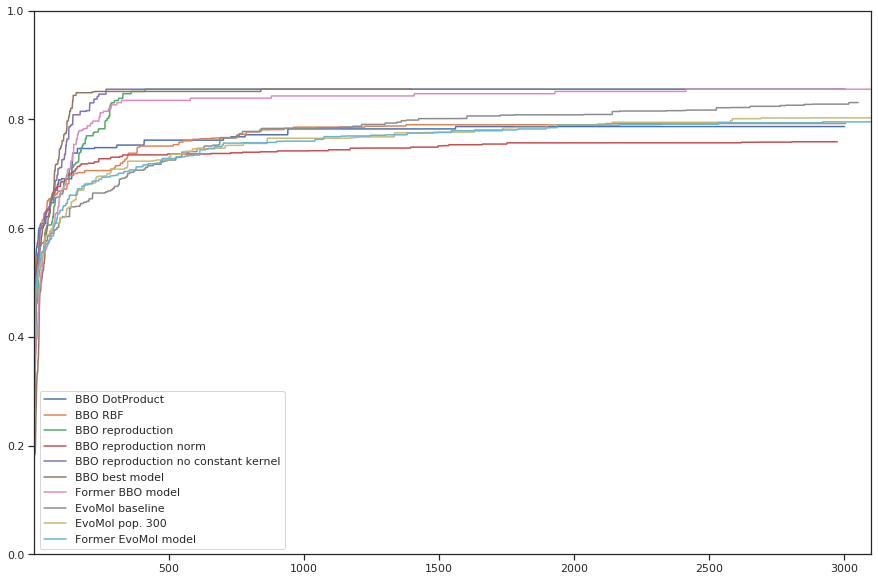

In [5]:
plot_ECDF(results_dict)